In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings

### Fit plot

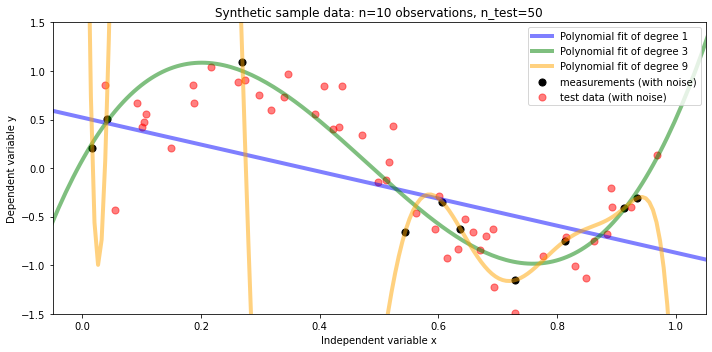

In [2]:
# show true curve
plot_truecurve = False

# show fits
plot_fits = True

# highlight_fits
plot_highlight      = np.array([1,3,9])
plot_highlight_cols = ["blue","green","orange"]

# show test data
plot_test = True

# number of observations
n_train = 10
n_test  = 50

# order of the polynomial used for the fit
M = np.array(list((range(1,n_train))))

# fix random state for reproducibility;
# use different random generators to ensure that the
# numbers generated by the second do not change
# if we vary the numbers generated by the first
# (this is sometimes called "coupling" -- reuse as much as possible
# between experiments, even though the experiments are run independently)
R_train_x     = np.random.default_rng(0)
R_train_noise = np.random.default_rng(1)
R_test_x      = np.random.default_rng(2)
R_test_noise  = np.random.default_rng(3)

# generate data
# - prepare
f_true = lambda x: np.sin(2*np.pi*x)

def generate_data ( f_true, R_x, R_noise, number_of_points, sd=0.3 ):
    x_points = np.sort(R_x.uniform(size=number_of_points))
    y_noise  = R_noise.normal(size=number_of_points, loc=0.0, scale=sd)
    y_true   = f_true(x_points)
    y_points = y_true + y_noise
    return x_points, y_points, y_true

# - training set
x_train, y_train, _ = generate_data ( f_true, R_train_x, R_train_noise, n_train )

# - test set
x_test, y_test, _ = generate_data ( f_true, R_test_x, R_test_noise, n_test )

# - dense and equally spaced for function plotting
x_full = np.linspace(-0.1,1.1,200)
y_full_true = f_true(x_full)

# plot
fig, ax = plt.subplots ( figsize=(10,5) )
if plot_truecurve:
    ax.plot ( x_full, y_full_true, linestyle="dashed", color="lightgreen", label="true curve (without noise)", linewidth=4 )
ax.scatter ( x_train, y_train, marker="o", color="black", label="measurements (with noise)", s=50 )

if plot_test:
    ax.scatter ( x_test, y_test, marker="o", color="red", label="test data (with noise)", s=50, alpha=0.5 )

if plot_fits:
    for i,m in enumerate(M if len(plot_highlight)==0 else plot_highlight):
        with warnings.catch_warnings(): # ignore "Polyfit may be poorly conditioned" warning
            warnings.simplefilter('ignore', np.RankWarning)
            poly = np.poly1d ( np.polyfit(x_train, y_train, m) )
        ax.plot ( x_full, poly(x_full),
                  color=plot_highlight_cols[i] if m in plot_highlight else "black",
                  alpha=0.5  if m in plot_highlight else 0.2,
                  linewidth=4 if m in plot_highlight else 1,
                  label="Polynomial fit of degree {0}".format(m) if m in plot_highlight else None )
    
    # dummy plot, could be included in the label above
    if len(plot_highlight)==0:
        ax.plot([],[],color="black",alpha=0.2,linewidth=1,
            label="Polynomial fits of degrees 1,...,{0}".format(n-1))

ax.set_ylim ( -1.5, 1.5 )
ax.set_xlim ( -0.05, 1.05 )
ax.set_title("Synthetic sample data: n={0} observations".format(n_train)+(", n_test={0}".format(n_test) if plot_test else "") )
ax.set_xlabel("Independent variable x")
ax.set_ylabel("Dependent variable y")
ax.legend( loc="upper right" )
plt.tight_layout()
#plt.savefig("plots/synthdata_n{0}_truecurve{1}_fit{2}_highlight{3}_test{4}.png".format(
#    n_train,int(plot_truecurve),int(plot_fits),"-".join(plot_highlight.astype("str")), int(plot_test) ), dpi=150)
plt.show()

### Residual plot

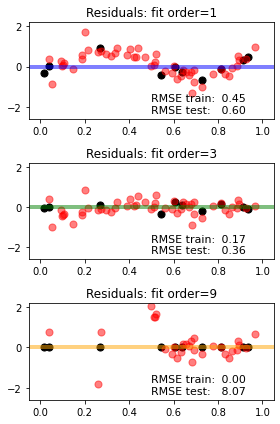

In [3]:
# show true curve
plot_truecurve = False

# show fits
plot_fits = True

# highlight_fits
plot_highlight = np.array([1,3,9])

# show test data
plot_test = True

# number of observations
n_train = 10
n_test  = 50

# order of the polynomial used for the fit
M = np.array(list((range(1,n_train))))

# fix random state for reproducibility;
# use different random generators to ensure that the
# numbers generated by the second do not change
# if we vary the numbers generated by the first
# (this is sometimes called "coupling" -- reuse as much as possible
# between experiments, even though the experiments are run independently)
R_train_x     = np.random.default_rng(0)
R_train_noise = np.random.default_rng(1)
R_test_x      = np.random.default_rng(2)
R_test_noise  = np.random.default_rng(3)

# generate data
# - prepare
f_true = lambda x: np.sin(2*np.pi*x)

def generate_data ( f_true, R_x, R_noise, number_of_points, sd=0.3 ):
    x_points = np.sort(R_x.uniform(size=number_of_points))
    y_noise  = R_noise.normal(size=number_of_points, loc=0.0, scale=sd)
    y_true   = f_true(x_points)
    y_points = y_true + y_noise
    return x_points, y_points, y_true

# - training set
x_train, y_train, _ = generate_data ( f_true, R_train_x, R_train_noise, n_train )

# test data
x_test, y_test, _ = generate_data ( f_true, R_test_x, R_test_noise, n_test )

# - dense and equally spaced for function plotting
x_full = np.linspace(-0.1,1.1,200)
y_full_true = f_true(x_full)

# plot


fig, axes = plt.subplots ( figsize=(4,6), nrows=3 )

for i,(m, mcol) in enumerate( zip(plot_highlight, plot_highlight_cols) ):
    ax=axes[i]
    
    ax.axhline ( y=0, color=mcol, linewidth=4, alpha=0.5 )
    
    with warnings.catch_warnings(): # ignore "Polyfit may be poorly conditioned" warning
        warnings.simplefilter('ignore', np.RankWarning)
        poly = np.poly1d ( np.polyfit(x_train, y_train, m) )
    
    y_fit_train = poly(x_train)
    ax.scatter ( x_train, y_train-y_fit_train, marker="o", color="black", label="measurements (with noise)", s=50 )
    
    y_fit_test = poly(x_test)
    ax.scatter ( x_test, y_test-y_fit_test, marker="o", color="red", label="test data (with noise)", s=50, alpha=0.5 )

    rmse_train = np.sqrt ( ( (y_train-y_fit_train)**2 ).sum() / n_train  )
    rmse_test  = np.sqrt ( ( (y_test -y_fit_test )**2 ).sum() / n_test   )
    
    ax.text ( x=0.5, y=-2.3, s="RMSE train:\nRMSE test:", size=11)
    ax.text ( x=0.8, y=-2.3, s="{0: .2f}\n{1: .2f}".format(rmse_train,rmse_test), size=11 )
    
    ax.set_ylim ( -2.6, 2.2 )
    ax.set_xlim ( -0.05, 1.05 )
    ax.set_title("Residuals: fit order={0}".format(m))
#     ax.set_xlabel("Independent variable x")
#     ax.set_ylabel("Dependent variable y")
    
plt.tight_layout()
#plt.savefig("plots/synthdatares_n{0}.png".format(n_train), dpi=150)

plt.show()

### Systematic analyses

In [4]:
def generate_data ( f_true, R_x, R_noise, number_of_points, sd=0.3 ):
    x_points = np.sort(R_x.uniform(size=number_of_points))
    y_noise  = R_noise.normal(size=number_of_points, loc=0.0, scale=sd)
    y_true   = f_true(x_points)
    y_points = y_true + y_noise
    return x_points, y_points, y_true

def get_rmse ( n_train, n_test, fit_orders ):
    if isinstance ( fit_orders, list ):
        fit_orders = np.array(fit_orders)
    
    R_train_x     = np.random.default_rng(0)
    R_train_noise = np.random.default_rng(1)
    R_test_x      = np.random.default_rng(2)
    R_test_noise  = np.random.default_rng(3)

    # generate data
    # - prepare
    f_true = lambda x: np.sin(2*np.pi*x)

    # - training set
    x_train, y_train, _ = generate_data ( f_true, R_train_x, R_train_noise, n_train )

    # test data
    x_test, y_test, _ = generate_data ( f_true, R_test_x, R_test_noise, n_test )

    # - dense and equally spaced for function plotting
    x_full = np.linspace(-0.1,1.1,200)
    y_full_true = f_true(x_full)
    
    rmse_train = {m: np.nan for m in fit_orders}
    rmse_test  = {m: np.nan for m in fit_orders}
    
    for m in fit_orders:
        with warnings.catch_warnings(): # ignore "Polyfit may be poorly conditioned" warning
            warnings.simplefilter('ignore', np.RankWarning)
            poly = np.poly1d ( np.polyfit(x_train, y_train, m) )

        y_fit_train = poly(x_train)
        ax.scatter ( x_train, y_train-y_fit_train, marker="o", color="black", label="measurements (with noise)", s=50 )

        y_fit_test = poly(x_test)
        ax.scatter ( x_test, y_test-y_fit_test, marker="o", color="red", label="test data (with noise)", s=50, alpha=0.5 )

        rmse_train[m] = np.sqrt ( ( (y_train-y_fit_train)**2 ).sum() / n_train  )
        rmse_test[m]  = np.sqrt ( ( (y_test -y_fit_test )**2 ).sum() / n_test   )
    
    return pd.DataFrame ( {"rmse_train": rmse_train, "rmse_test": rmse_test} )

### Analysis #1: Vary the fit order between 0 and 9

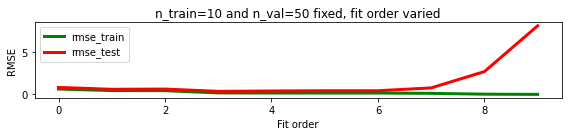

In [5]:
get_rmse ( 10, 50, list(range(10)) ).plot( figsize=(8,2), title="n_train=10 and n_val=50 fixed, fit order varied",
                                           xlabel="Fit order", ylabel="RMSE", color=["green","red"], linewidth=3 )
plt.tight_layout()
#plt.savefig("plots/systematic_varyorder.png",dpi=150)

=> Fit order = 3 erscheint angemessen.

### Analysis #2: Vary the fit order between 0 and 9, 10 training points, 500 validation points

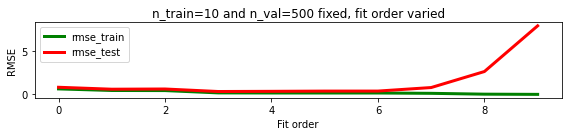

In [6]:
get_rmse ( 10, 500, list(range(10)) ).plot( figsize=(8,2), title="n_train=10 and n_val=500 fixed, fit order varied",
                                           xlabel="Fit order", ylabel="RMSE", color=["green","red"], linewidth=3 )
plt.tight_layout()

=> Fir order = 3 erscheint immer noch angemessen, RMSE bei steigender fit order größer (schlechter).

### Analysis #3: Vary the fit order between 0 and 9, 10 training points, 3 validation points

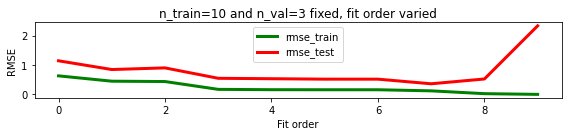

In [7]:
get_rmse ( 10, 3, list(range(10)) ).plot( figsize=(8,2), title="n_train=10 and n_val=3 fixed, fit order varied",
                                           xlabel="Fit order", ylabel="RMSE", color=["green","red"], linewidth=3 )
plt.tight_layout()

=> Fit order = 3 scheint immer noch am ehesten angemessen, RMSE train bei steigender fit order größer (schlechter). 

### Analysis #4: Vary the fit order between 0 and 9, 100 training points, 50 validation points

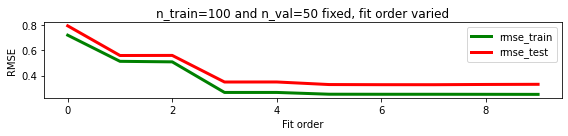

In [8]:
get_rmse ( 100, 50, list(range(10)) ).plot( figsize=(8,2), title="n_train=100 and n_val=50 fixed, fit order varied",
                                           xlabel="Fit order", ylabel="RMSE", color=["green","red"], linewidth=3 )
plt.tight_layout()

=> Starkes Einknicken von fit order = 2 zu fit order = 3. Danach konstante Werte für RMSE. RMSE train konstant schlechter als train. Nach diesem Plot ist auch fit order = 9 angemessen.

### Analysis #5: Vary the fit order between 0 and 99, 100 training points, 50 validation points

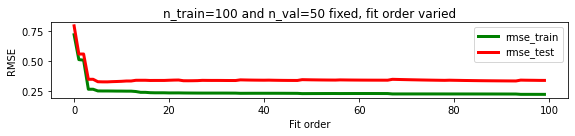

In [9]:
get_rmse ( 100, 50, list(range(100)) ).plot( figsize=(8,2), title="n_train=100 and n_val=50 fixed, fit order varied",
                                           xlabel="Fit order", ylabel="RMSE", color=["green","red"], linewidth=3 )
plt.tight_layout()

=> Starkes Einknicken bei fit order ~ 3. Danach konstante Werte bis fit order = 100. RMSE train ab fit order ~ 3 konstant schlechter als RMSE test.

### Analysis #6: Fix fit order=3,  number of training observations varied between 5 and 100, 50 validation points

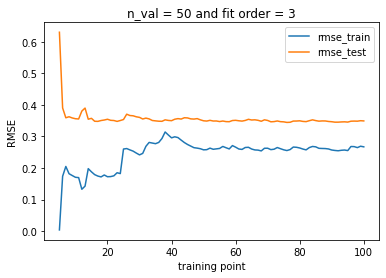

In [10]:
rmse_train_values = []
rmse_test_values = []
train_points = [i for i in range(5, 101)]

for train_point in train_points:
    rmse = get_rmse(train_point, 50, [3.00])
    rmse_train_values.append(rmse["rmse_train"])
    rmse_test_values.append(rmse["rmse_test"])


fig, ax = plt.subplots()
ax.plot(train_points, rmse_train_values, label="rmse_train")
ax.plot(train_points, rmse_test_values, label="rmse_test")
ax.set_xlabel("training point")
ax.set_ylabel("RMSE")
ax.set_title("n_val = 50 and fit order = 3")
plt.legend()
plt.show()

=> RMSE train wird bei fortlaufender Anzahl an Trainingspunkten bis train = 40 schlechter. RSME Test wird bis train = 40 besser und bleibt dann im wesentlichen stabil.

**Frage:** Warum wird RMSE_train schlechter, wenn das Trainings-Set vergrößert wird?

**Antwort:** Bei wachsender Anzahl an Trainingsdaten wird der Fehler größer, da es zu mehr und größeren Abweichungen des Models mit den Trainingsdaten kommt. Die Residuen werden dabei immer größer. Das Modell ist also nicht zu sehr an den Testdaten angepasst (kein Overfit), ein eventueller Underfit müsste geprüft werden.